<a href="https://colab.research.google.com/github/bioai96/SKTFLYAI/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B02_%EB%8B%A4%EC%A4%91%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 다중 선형회귀 (Multiple Linear Regression)
---

* 독립 변수가 2개 이상인 데이터의 선형 회귀문제

### 문제 1. 라이브러리

In [2]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.1 kB/s 
     |████████████████████████████████| 5.8 MB 49.8 MB/s 
     |████████████████████████████████| 1.6 MB 65.0 MB/s 
     |████████████████████████████████| 438 kB 76.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.8.2


In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings(action='ignore')

### 문제 2. 데이터 만들기

In [6]:
x1_data = [1,0,3,0,5]
x2_data = [0,2,0,4,0]
y_data = [1,2,3,4,5]

### 문제 3. 경사하강법

가설: $$  \hat{y}=W_1x_1 + W_2x_2 +b  $$

#### 변수 초기화

In [7]:
W1 = tf.Variable(tf.random.uniform((1,),-10.0, 10.0))
W2 = tf.Variable(tf.random.uniform((1,),-10.0, 10.0))
b = tf.Variable(tf.random.uniform((1,),-10.0, 10.0))

learning_rate = tf.constant(0.001)
epochs = 1000
costs = []

In [8]:
# 가중치가 배열 형태 

print(W1.numpy(), W2.numpy(), b.numpy())

[3.521719] [6.042965] [-5.002668]


#### 경사하강법

In [12]:
for i in range(epochs+1) :
  with tf.GradientTape() as tape :
    hypothesis = W1 * x1_data + W2 * x2_data + b 
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    costs.append(cost.numpy())
  
  W1_grad, W2_grad, b_grad = tape.gradient(cost, [W1,W2,b])
  W1.assign_sub(learning_rate * W1_grad)
  W2.assign_sub(learning_rate * W2_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 50 == 0 :
    print("{:5} | {:.6f} | {:.4f} | {:.4f} | {:.6}".format(i, cost.numpy(), W1.numpy()[0], W2.numpy()[0], b.numpy()[0]))

    0 | 64.082985 | 3.4874 | 5.9865 | -5.02487
   50 | 27.451115 | 2.9138 | 4.8585 | -5.41795
  100 | 14.474759 | 2.6652 | 4.1307 | -5.60241
  150 | 9.467773 | 2.5575 | 3.6555 | -5.67271
  200 | 7.379491 | 2.5085 | 3.3408 | -5.67911
  250 | 6.425639 | 2.4823 | 3.1287 | -5.64908
  300 | 5.930627 | 2.4638 | 2.9826 | -5.598
  350 | 5.626806 | 2.4471 | 2.8791 | -5.53472
  400 | 5.405212 | 2.4301 | 2.8032 | -5.46445
  450 | 5.220773 | 2.4122 | 2.7452 | -5.39029
  500 | 5.054644 | 2.3936 | 2.6989 | -5.31414
  550 | 4.898855 | 2.3744 | 2.6603 | -5.23719
  600 | 4.749992 | 2.3549 | 2.6268 | -5.16014
  650 | 4.606548 | 2.3352 | 2.5968 | -5.08345
  700 | 4.467813 | 2.3156 | 2.5691 | -5.00742
  750 | 4.333414 | 2.2961 | 2.5431 | -4.9322
  800 | 4.203122 | 2.2767 | 2.5182 | -4.85791
  850 | 4.076775 | 2.2575 | 2.4943 | -4.7846
  900 | 3.954238 | 2.2386 | 2.4710 | -4.71232
  950 | 3.835389 | 2.2199 | 2.4484 | -4.64107
 1000 | 3.720115 | 2.2015 | 2.4262 | -4.57086


#### 비용 변환 시각화

학습이 진행되면서 Cost가 어떻게 변화하는지 그래프로 표시해보자

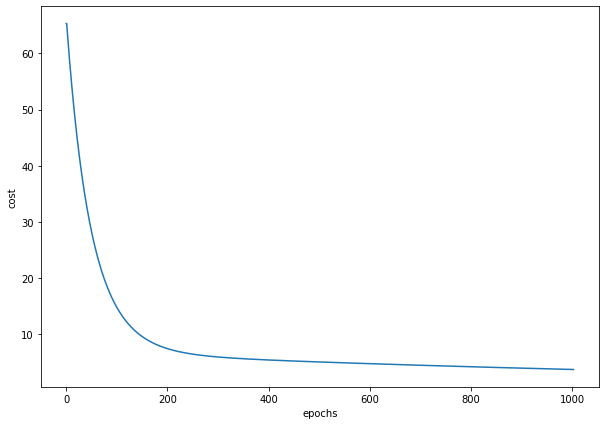

In [14]:
plt.figure(figsize=(10,7))
plt.plot(costs)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()

### 문제 4. 연습문제

아래의 데이터로 다중 선형회귀의 문제를 풀어보세요

### 문제 1. 데이터 만들기

* 독립 변수가 3개인 다중 회귀문제 

### 문제 2. 경사하강법

#### 경사하강법

#### 결과 시각화 

끝